## Clustering vs Spatial clustering

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
#import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
#import pysal.contrib.clusterpy as cp
#import clusterpy

np.random.seed(123)

In [2]:
file = 'nyc_abb.json'

In [3]:
abb = gpd.read_file(file)
abb.crs

{'init': 'epsg:2263'}

In [4]:
abb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 20 columns):
id                             3201 non-null float64
longitude                      3201 non-null float64
latitude                       3201 non-null float64
accommodates                   3201 non-null float64
bathrooms                      3201 non-null float64
bedrooms                       3201 non-null float64
beds                           3201 non-null float64
minimum_nights                 3201 non-null float64
maximum_nights                 3201 non-null float64
number_of_reviews              3201 non-null float64
reviews_per_month              3201 non-null float64
review_scores_rating           3201 non-null float64
review_scores_accuracy         3201 non-null float64
review_scores_cleanliness      3201 non-null float64
review_scores_checkin          3201 non-null float64
review_scores_communication    3201 non-null float64
review_scores_location         3201 n

In [5]:
ratings = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', \
     'review_scores_checkin', 'review_scores_communication', 'review_scores_location', \
     'review_scores_value']

### Exploratory Data Analysis

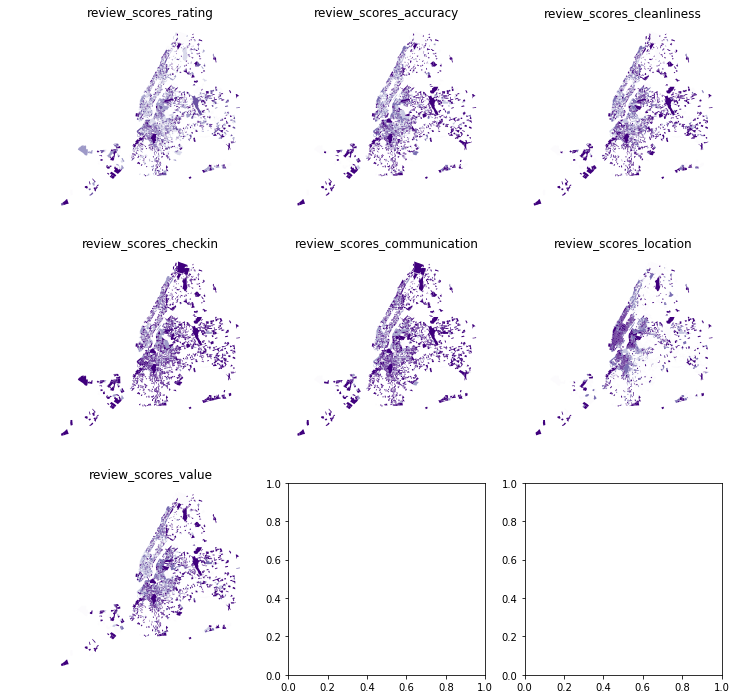

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(ratings):
    ax = axs[i]
    abb.plot(column=col, ax=ax, scheme='Quantiles', linewidth=0, cmap='Purples')
    ax.set_axis_off()
    ax.set_title(col)
plt.show()


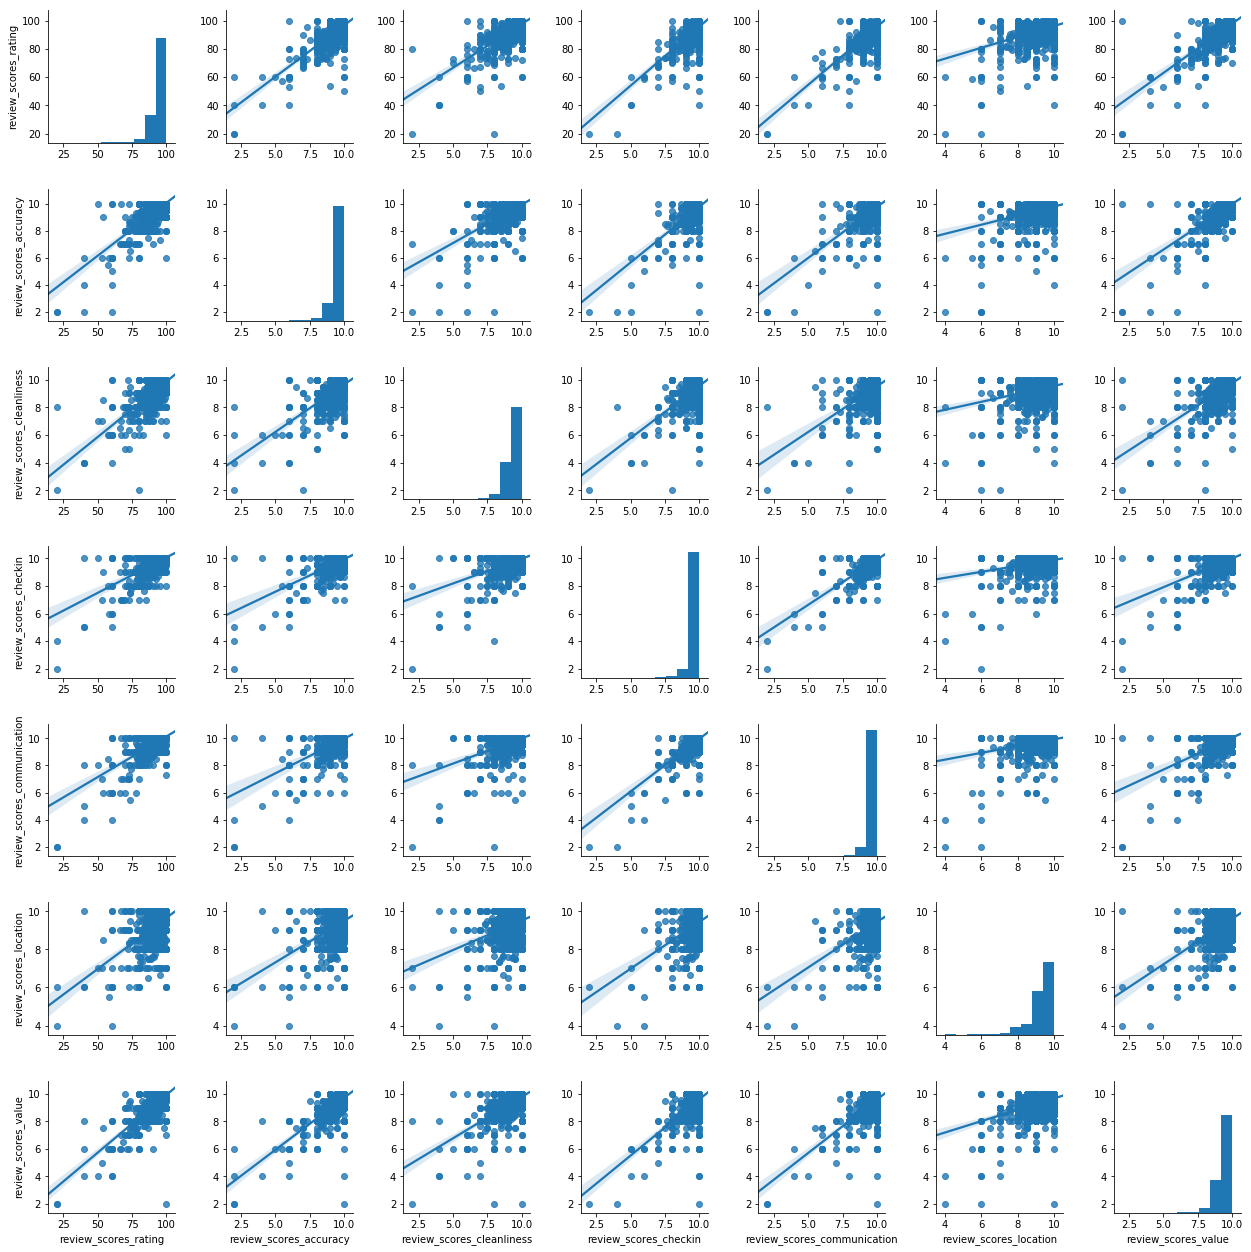

In [7]:
_ = sns.pairplot(abb[ratings], kind='reg')

## Clustering using K-means (without Spatial Constraints)

In [8]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(abb[ratings])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([2, 0, 2, ..., 2, 0, 0], dtype=int32)

In [10]:
abb['kmeanslabels'] = kmeans.labels_

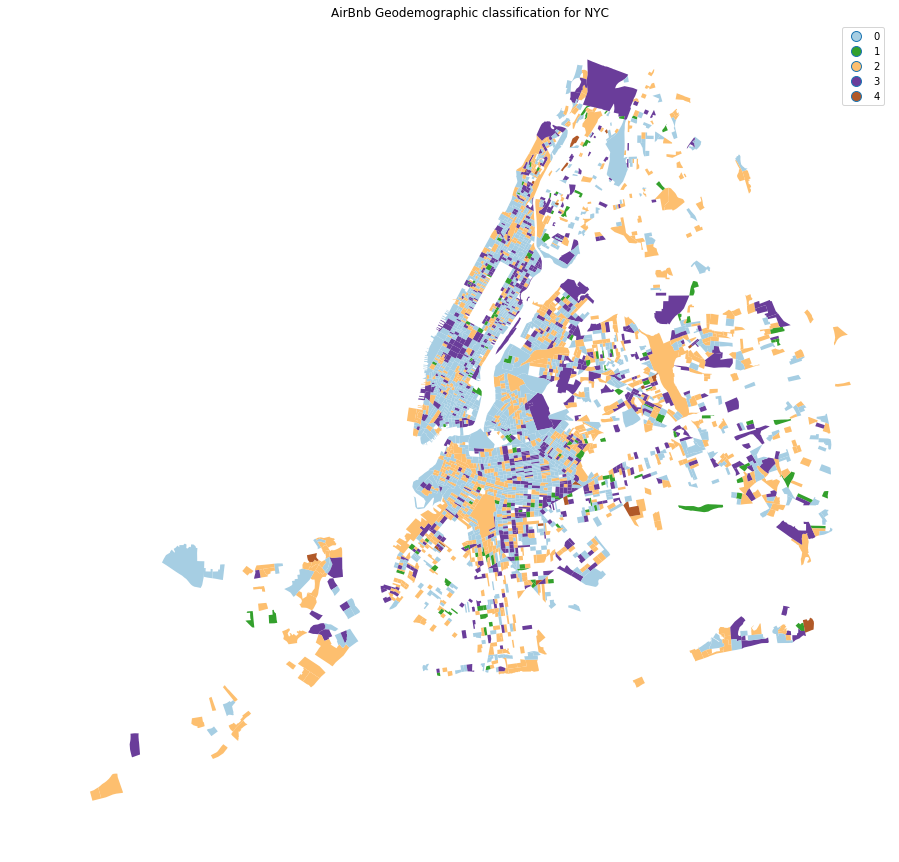

In [11]:
f, ax = plt.subplots(1, figsize=(15, 15))
abb.plot(column='kmeanslabels', cmap="Paired", categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
#plt.axis('equal')
plt.title('AirBnb Geodemographic classification for NYC')
plt.show()

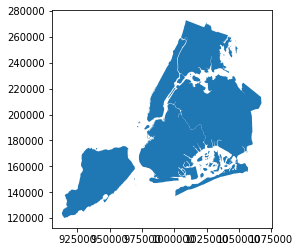

In [12]:
boro = gpd.read_file('Borough Boundaries/geo_export_31e828ed-6fe9-44a8-b2de-15f7423e224d.shp')
boro = boro.to_crs(epsg=2263)
boro.plot()

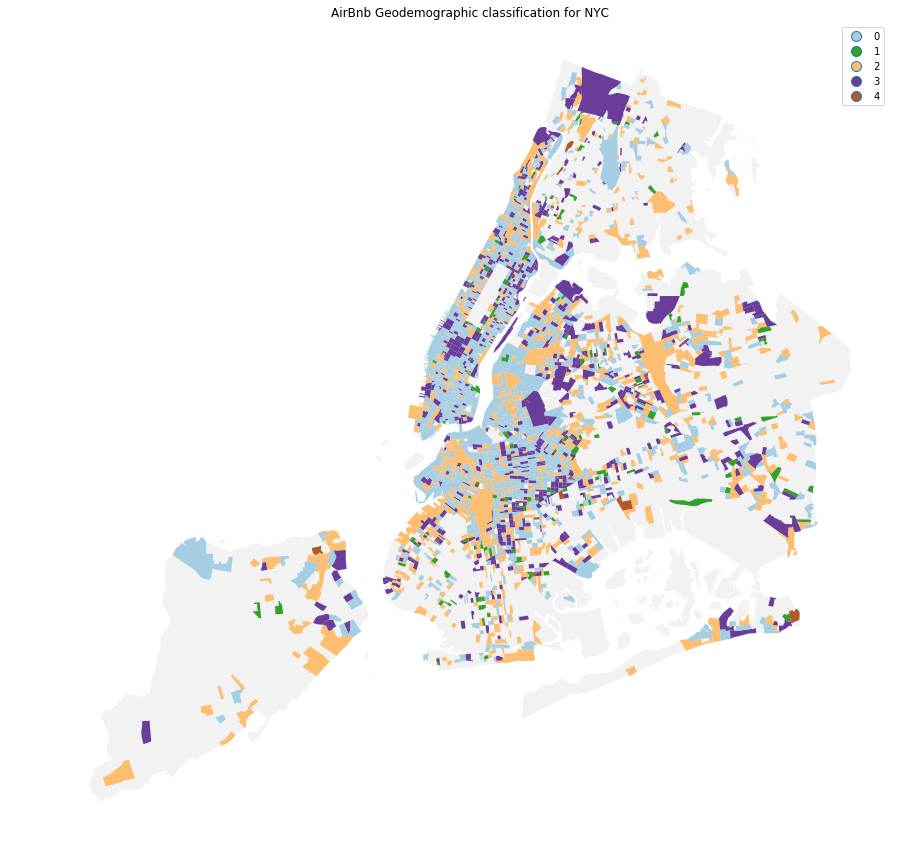

In [18]:
f, ax = plt.subplots(1, figsize=(15, 15))
boro.plot(ax=ax, facecolor='grey', alpha=0.1)
abb.plot(column='kmeanslabels', cmap="Paired", categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
#plt.axis('equal')
plt.title('AirBnb Geodemographic classification for NYC')
plt.show()

In [19]:
sizes = abb.groupby('kmeanslabels').size()
sizes

kmeanslabels
0    1458
1     133
2     981
3     609
4      20
dtype: int64

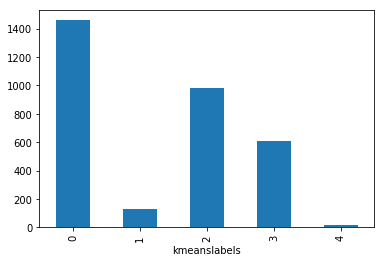

In [20]:
_ = sizes.plot(kind='bar')

In [21]:
means = abb.groupby('kmeanslabels')[ratings].mean()
means.T

kmeanslabels,0,1,2,3,4
review_scores_rating,94.199237,79.056660,98.272030,89.358292,51.650
review_scores_accuracy,9.647998,8.493645,9.885268,9.284832,5.675
review_scores_cleanliness,9.395992,8.145560,9.773340,8.965774,6.425
review_scores_checkin,9.799785,9.086950,9.945425,9.552032,7.300
review_scores_communication,9.823181,8.938919,9.951180,9.574631,6.625
review_scores_location,9.369662,8.611565,9.578072,9.002378,6.950
review_scores_value,9.452979,8.178106,9.777932,9.067185,5.625


In [22]:
#details = abb.groupby('kmeanslabels')[ratings].describe()
#details.T

## Clustering with Spatial Constraints

First, we have to define space by creating a spatial weights matrix for areas to be aggregated. Can be done in PySal but PySal requires shapefiles not geojsons. 

In [23]:
abb.to_file('nyc_abb.shp')

In [ ]:
#Creates contiguity matrix: 

In [ ]:
#w = ps.queen_from_shapefile('nyc_abb.shp')

Storing in .gal file to use later

In [ ]:
'''fo = ps.open('nyc_abb.gal', 'w')
fo.write(w)
fo.close()'''

For this iteration of clustering, will use the Automated Zoning Procedure (AZP, Openshaw and Rao, 1995), which takes the set of attributes, the spatial weights, and the desired number of resulting regions.


In [ ]:
#layer = cp.Layer()

In [ ]:
#clusterpy example from documentation
'''calif = cp.importArcData("clusterpy/data_examples/CA_Polygons")
calif.fieldNames
calif.dataOperation("g70_01 = float(POP2001 - POP1970) / POP1970")
calif.exportArcData("testOutput/azp_5_input")
calif.cluster('azp', ['g70_01'], 15, dissolve=1)
calif.results[0].exportArcData("testOutput/azp_5_solution")'''

In [ ]:
#Layer.cluster('azp',vars,regions,<wType>,<std>,<initialSolution>,<dissolve>,<dataOperations>)

In [ ]:
'''import clusterpy as cp
ny = cp.importArcData('nyc_abb')
newratings = ['reviews_pe','review_sco','review_s_1','review_s_2','review_s_3',
              'review_s_4','review_s_5','review_s_6']
ny.cluster('azp', newratings, 50, wType='queen')'''

Loading nyc_abb.dbf
Loading nyc_abb.shp
Done
Getting variables
Variables successfully extracted
Running original AZP algorithm (Openshaw and Rao, 1995)
Number of areas:  3201
Number of regions:  50
Disconnected areas neighs:  [3073, 3075, 775, 3116, 1197, 16, 2580, 2847, 3062, 33, 35, 553, 44, 3117, 3118, 3119, 3120, 49, 50, 51, 54, 55, 56, 57, 58, 3137, 3138, 2627, 48, 2551, 1101, 81, 83, 85, 86, 87, 88, 2909, 1374, 741, 2913, 99, 868, 2917, 2918, 103, 104, 2921, 2666, 2919, 109, 878, 624, 3185, 114, 3187, 3189, 3190, 105, 3192, 3193, 3194, 3195, 2940, 1150, 129, 133, 647, 137, 1424, 3139, 151, 3176, 922, 156, 1181, 1182, 3184, 930, 163, 164, 165, 113, 682, 2987, 173, 175, 1204, 183, 2461, 185, 955, 188, 2750, 191, 1218, 197, 2504, 3018, 3191, 2467, 2468, 3186, 478, 3041, 3042, 2787, 3045, 2792, 3123, 499, 157, 3113, 2815]
Constructing regions


In [ ]:
#abb['azp'] = layer.region2areas
#abb['azp'].head()

In [ ]:
#abb.plot(column='azp', categorical=True, legend=True, linewidth=0)

In [ ]:
fig, ax = plt.subplots(1, figsize=(9, 9))
abb.plot(column='azp', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.title('AirBnb-based neighborhoods for NYC')
plt.show()